# **Data preprocessing**

 **Importing important libraries**

In [ ]:
import pandas as pd
import numpy as np
 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm

import warnings

warnings.filterwarnings("ignore")


import random
from sklearn.impute import SimpleImputer

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

**Reading the data and finding the data information and plots**

In [ ]:
heart_data = pd.read_csv('heart.csv.txt')

In [ ]:
heart_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


-------------------------------------------------- age --------------------------------------------------


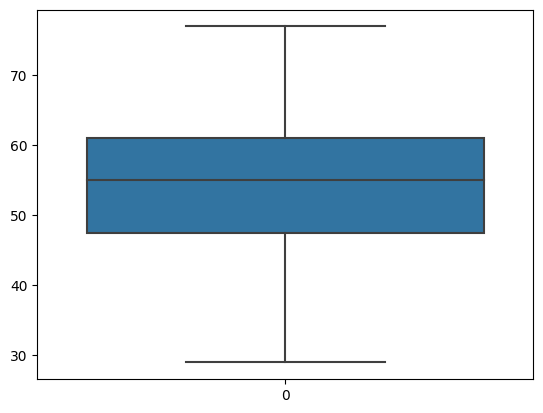

-------------------------------------------------- sex --------------------------------------------------


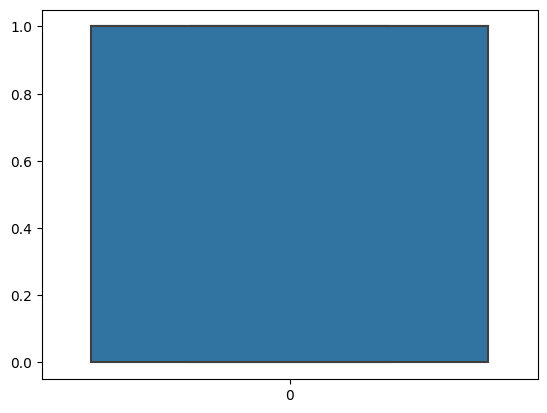

-------------------------------------------------- cp --------------------------------------------------


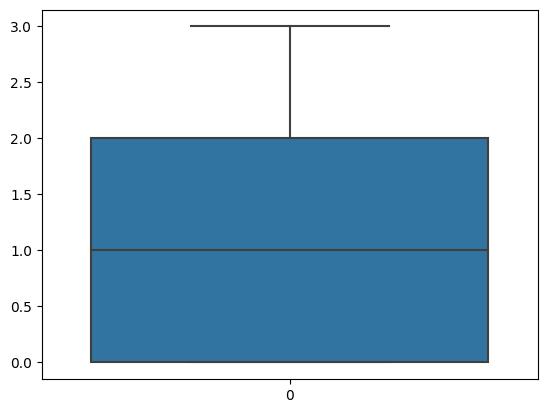

-------------------------------------------------- trestbps --------------------------------------------------


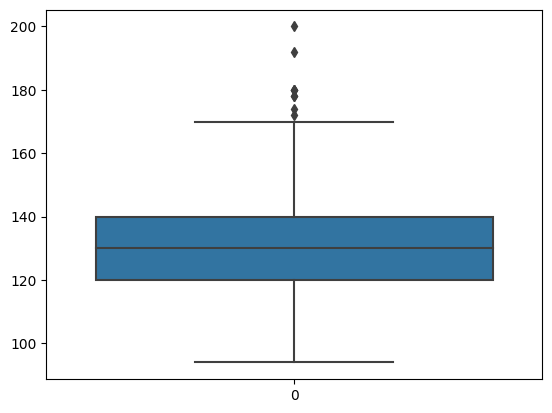

-------------------------------------------------- chol --------------------------------------------------


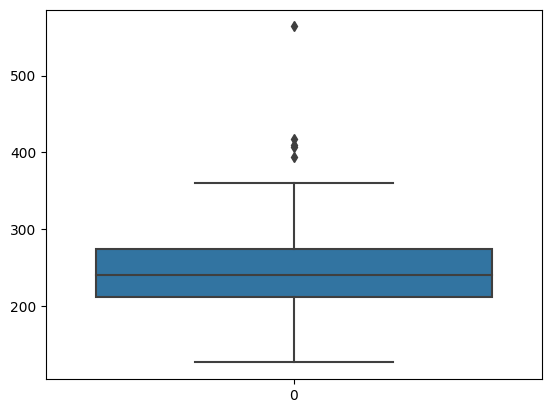

-------------------------------------------------- fbs --------------------------------------------------


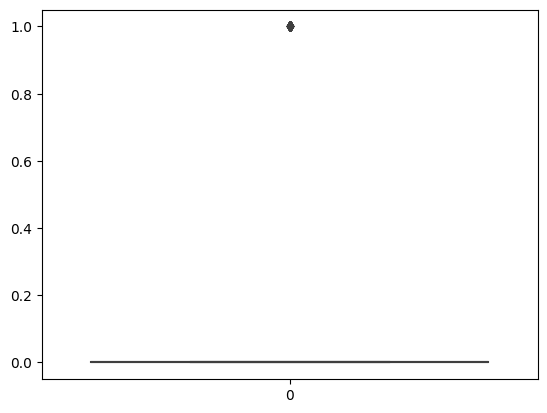

-------------------------------------------------- restecg --------------------------------------------------


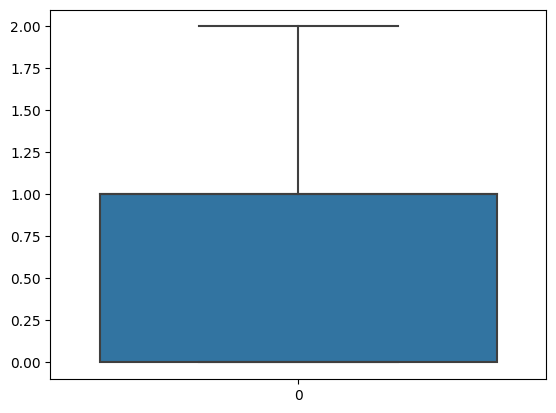

-------------------------------------------------- thalach --------------------------------------------------


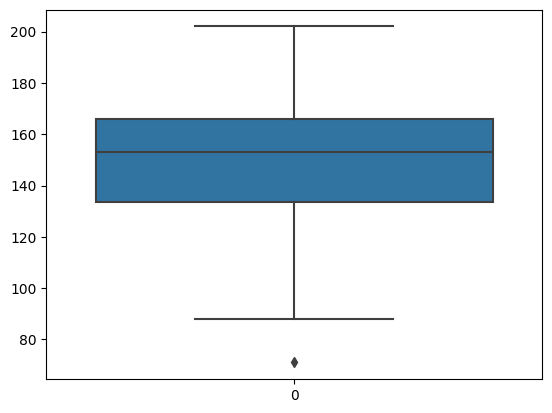

-------------------------------------------------- exang --------------------------------------------------


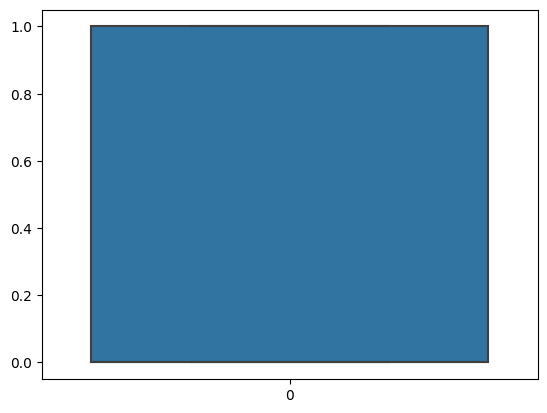

-------------------------------------------------- oldpeak --------------------------------------------------


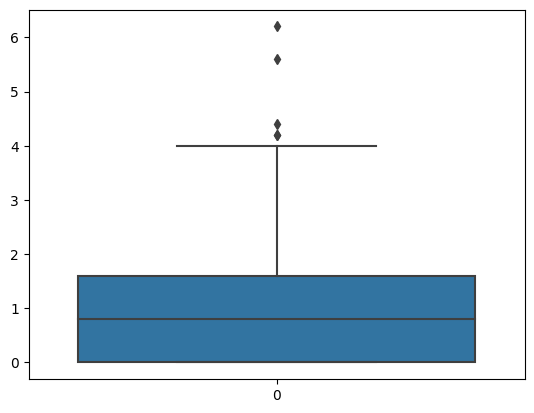

-------------------------------------------------- slope --------------------------------------------------


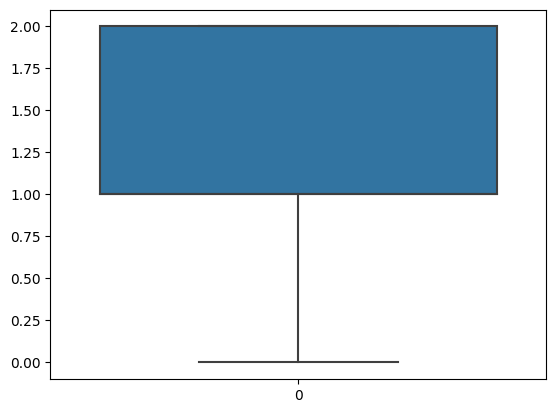

-------------------------------------------------- ca --------------------------------------------------


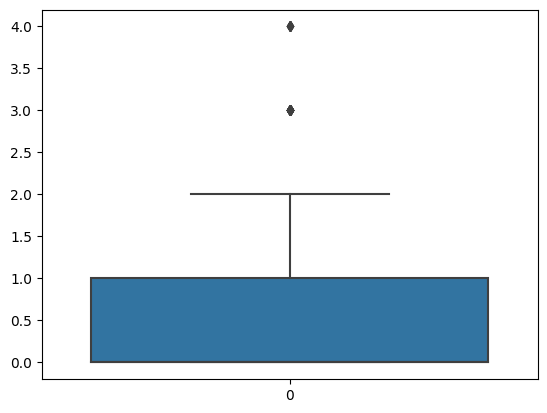

-------------------------------------------------- thal --------------------------------------------------


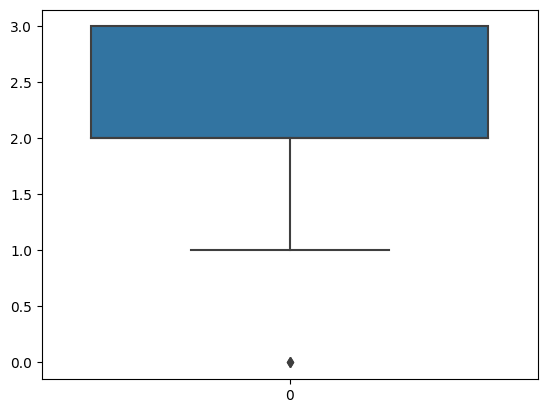

-------------------------------------------------- target --------------------------------------------------


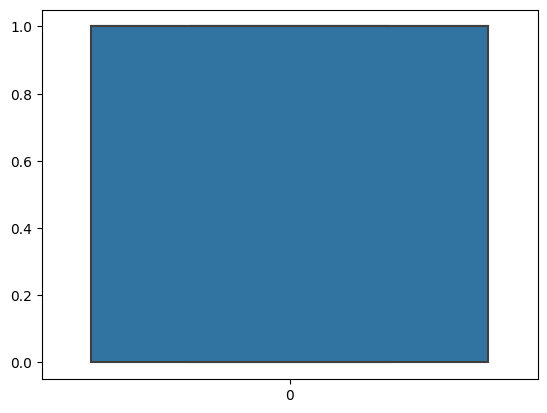

In [ ]:
for column in heart_data.columns:
    print('-'*50 + ' ' + column + ' ' + '-'*50)
    sns.boxplot(data=heart_data[column])
    plt.show()

<Axes: >

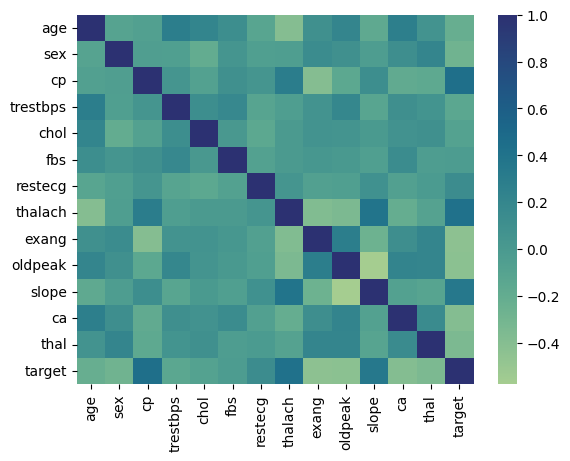

In [ ]:
correlation = heart_data.corr()
sns.heatmap(correlation, cmap='crest')

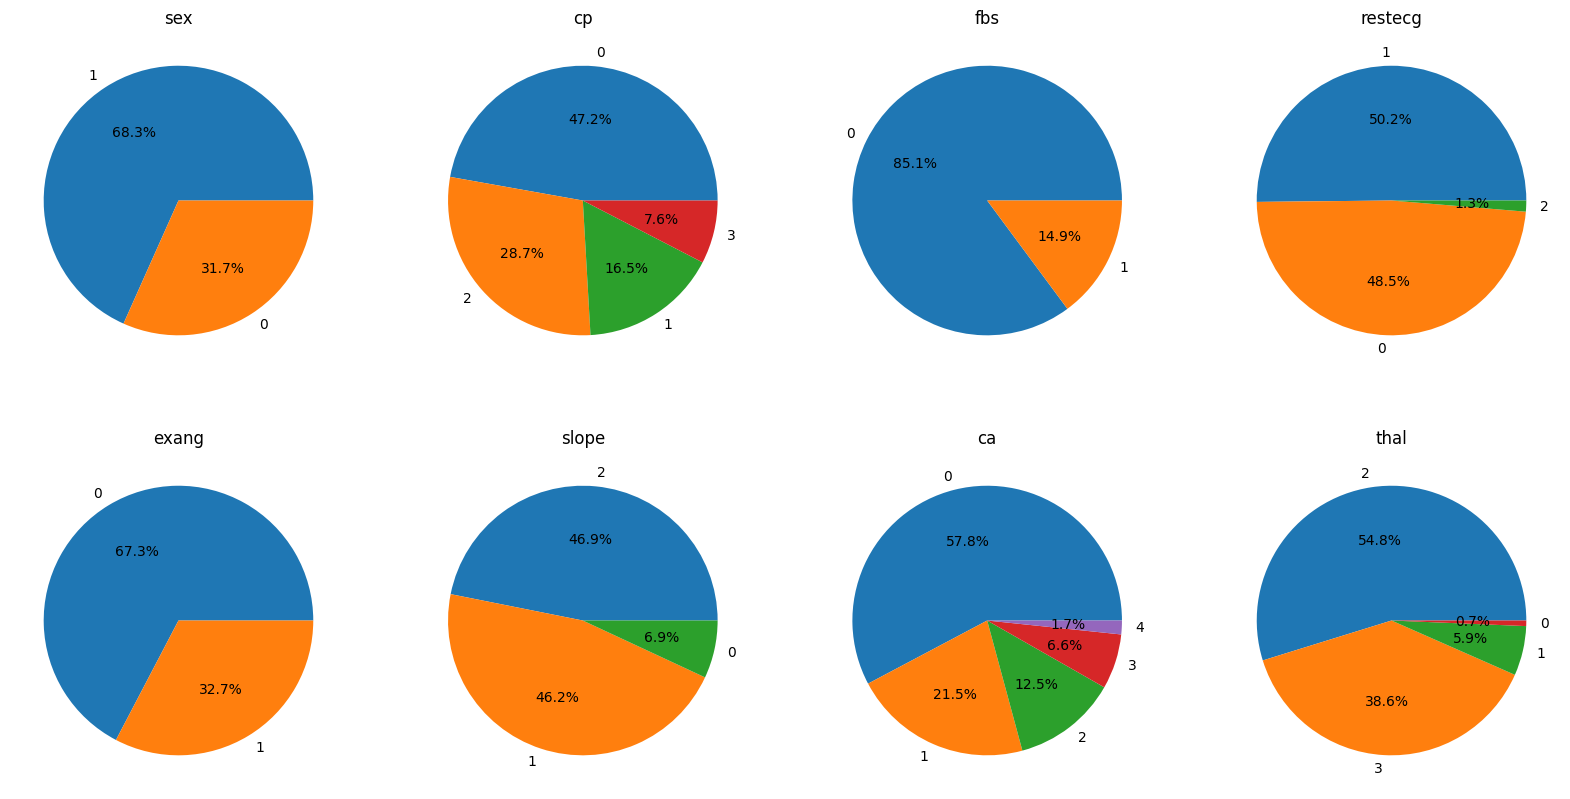

In [ ]:

columns_list = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

for index, column in enumerate(columns_list):
  row = index // 4
  col = index % 4
  value_counts = heart_data[column].value_counts()
  axs[row, col].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')
  axs[row, col].set_title(column)

plt.show()


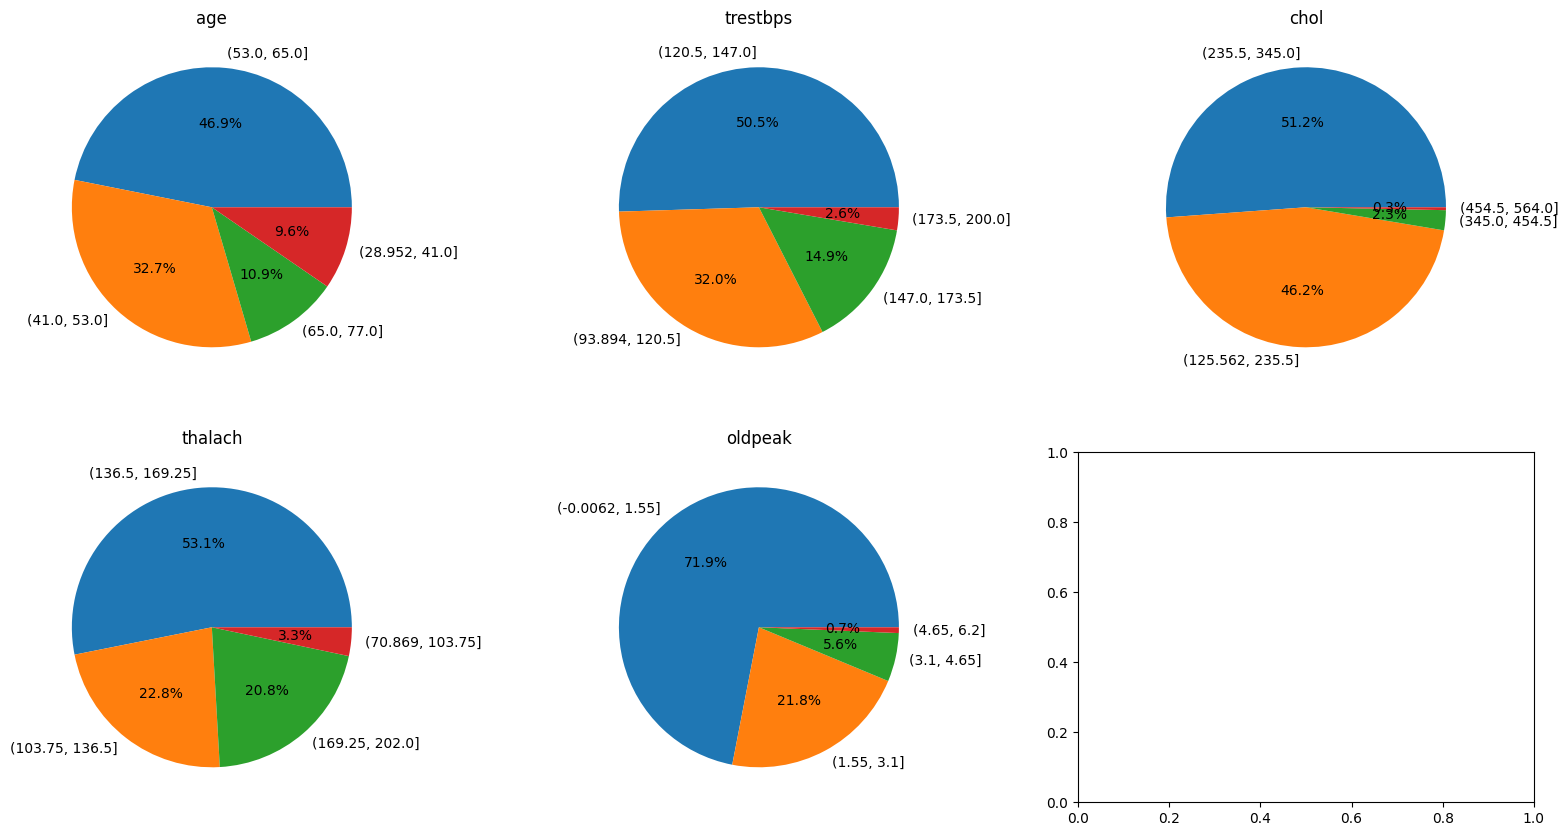

In [ ]:
columns_con = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


fig, axs = plt.subplots(2, 3, figsize=(20, 10))

# Loop over columns
for index, column in enumerate(columns_con):
    # Bin the data into 10 intervals
    bins = pd.cut(heart_data[column], bins=4)
    # Get the value counts of each interval
    value_counts = bins.value_counts()
    # Plot the pie chart
    row = index // 3
    col = index % 3
    axs[row, col].pie(value_counts, labels=value_counts.index, autopct='%1.1f%%')
    axs[row, col].set_title(column)

plt.show()

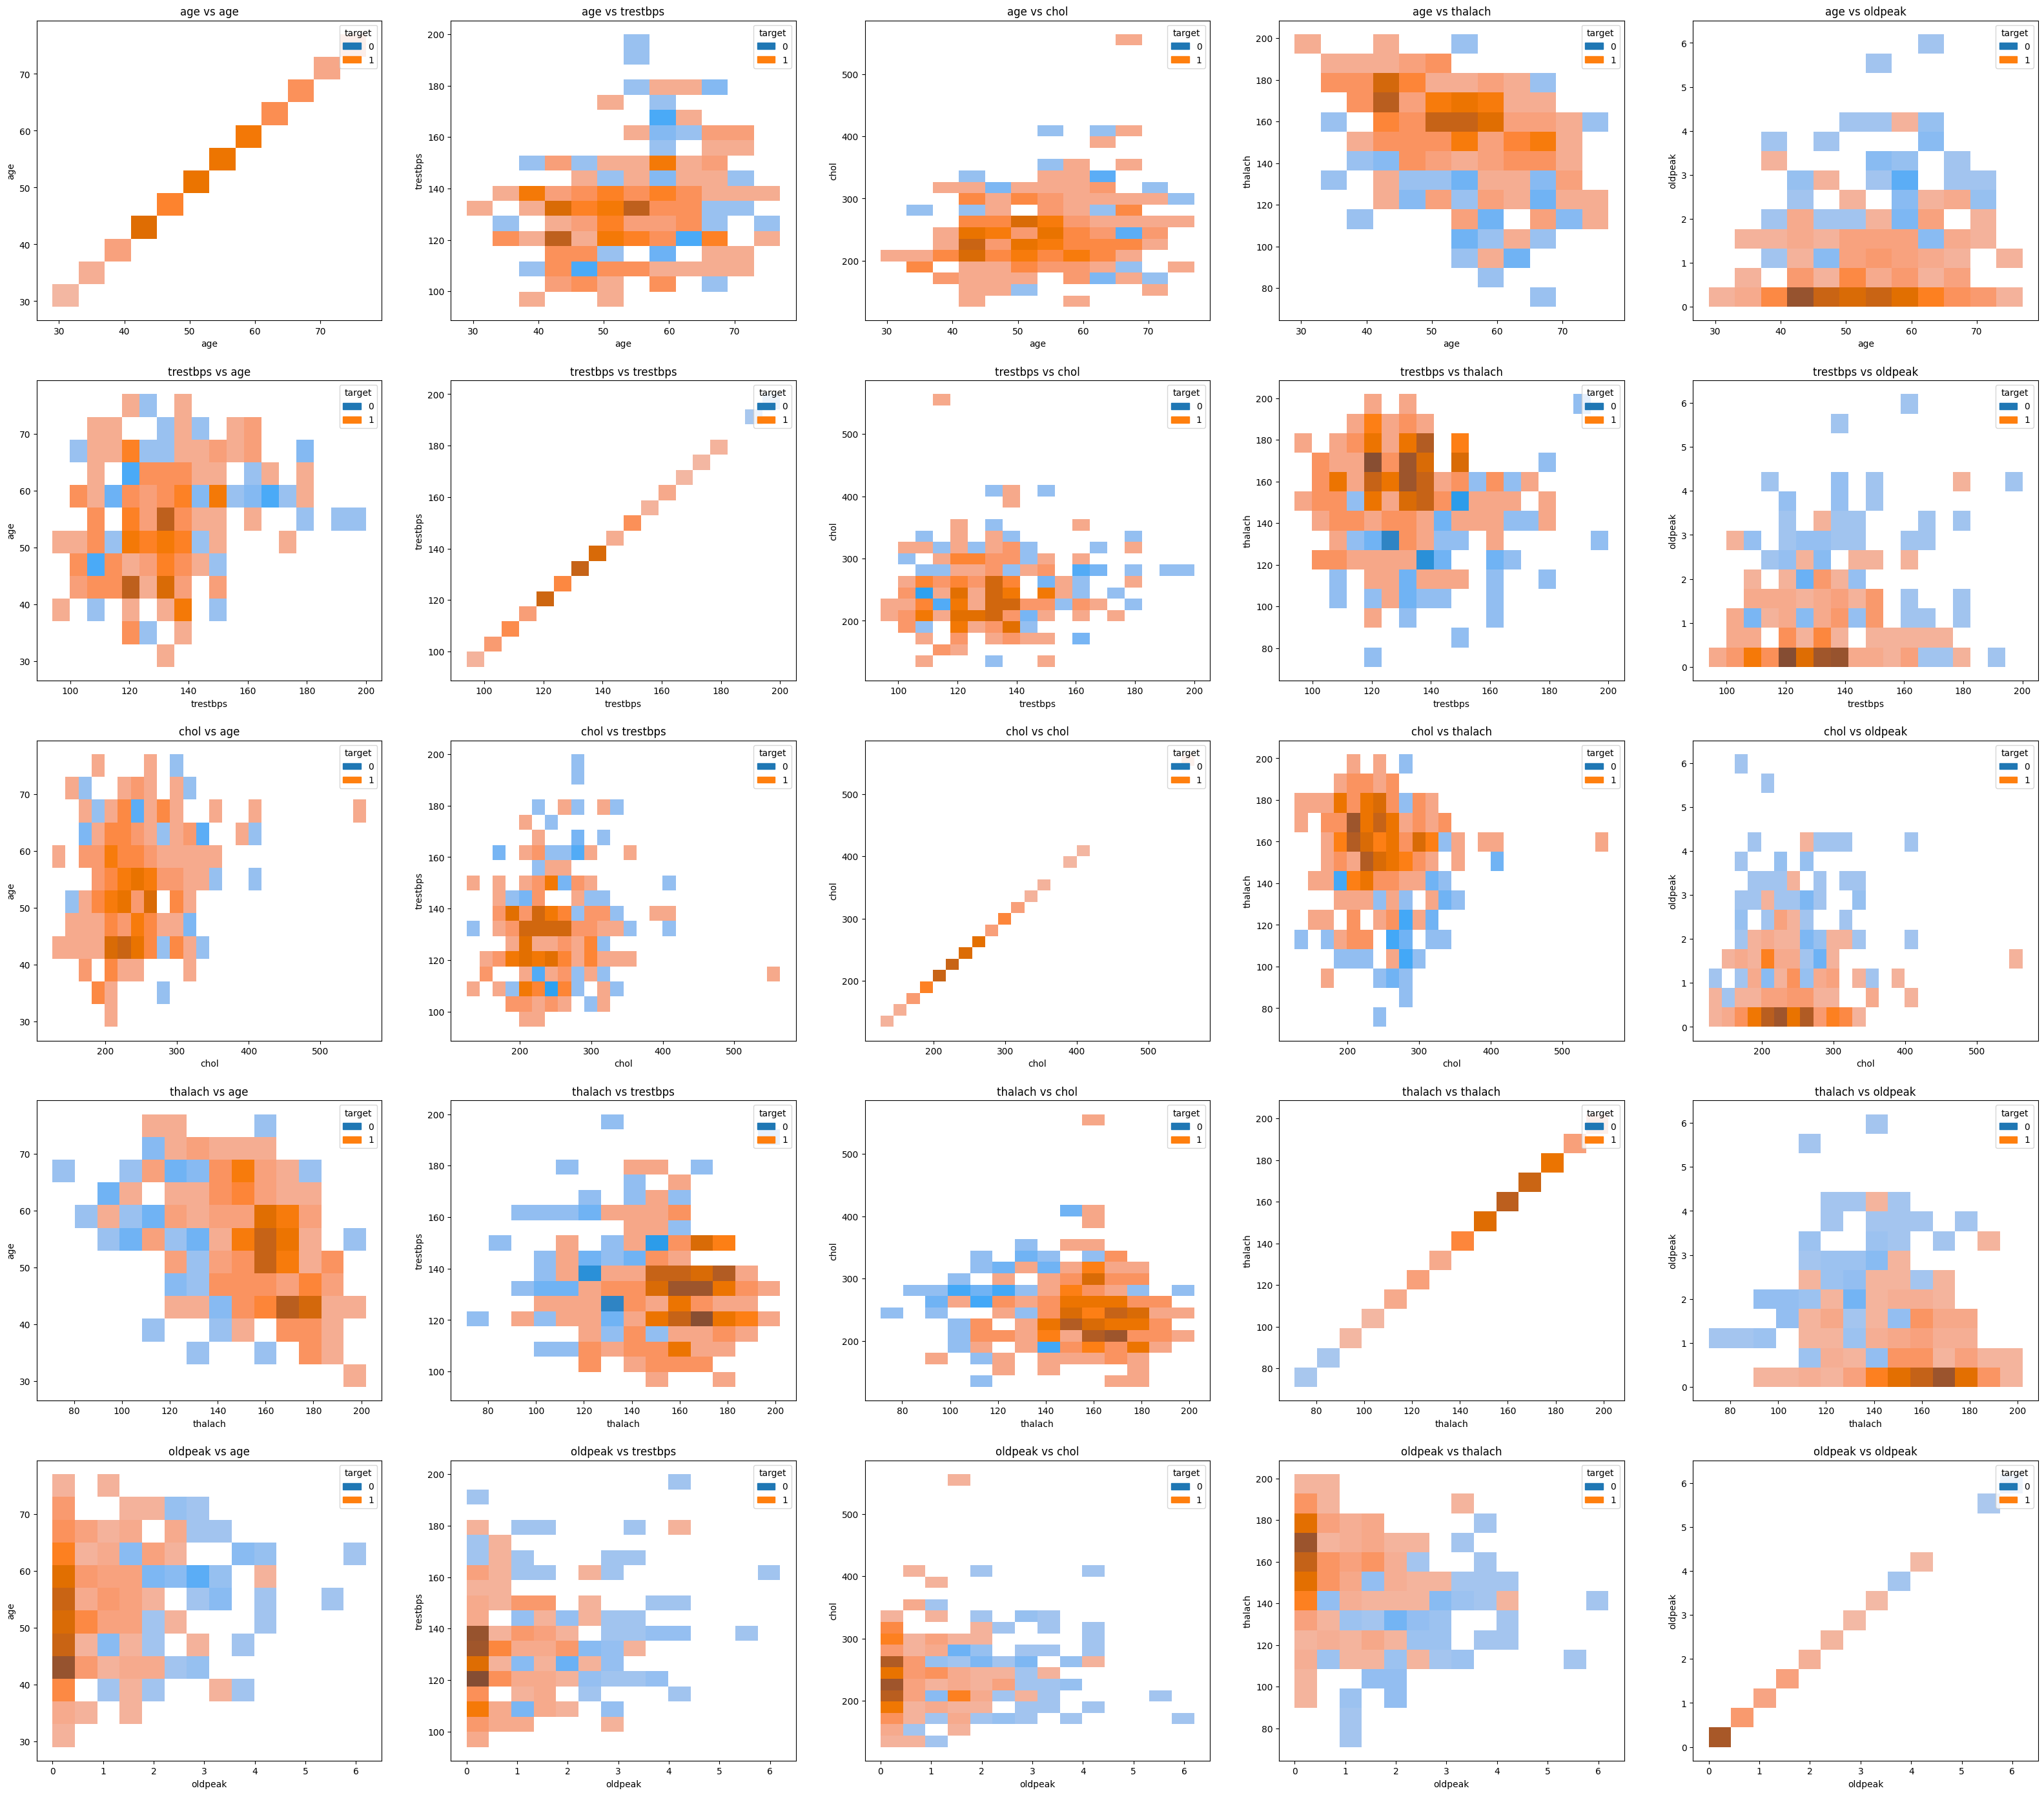

In [ ]:
fig, axs = plt.subplots(5, 5, figsize=(40, 35))

for i, column1 in enumerate(columns_con):
    for j, column2 in enumerate(columns_con):
        # Bin the data into 10 intervals
        bins = pd.cut(heart_data[column1], bins=4)
        # Get the value counts of each interval
        value_counts = bins.value_counts()
        # Plot the 2D histogram
        sns.histplot(heart_data, x=column1, y=column2, hue="target", ax=axs[i, j])
        axs[i, j].set_title(f"{column1} vs {column2}")

plt.show()

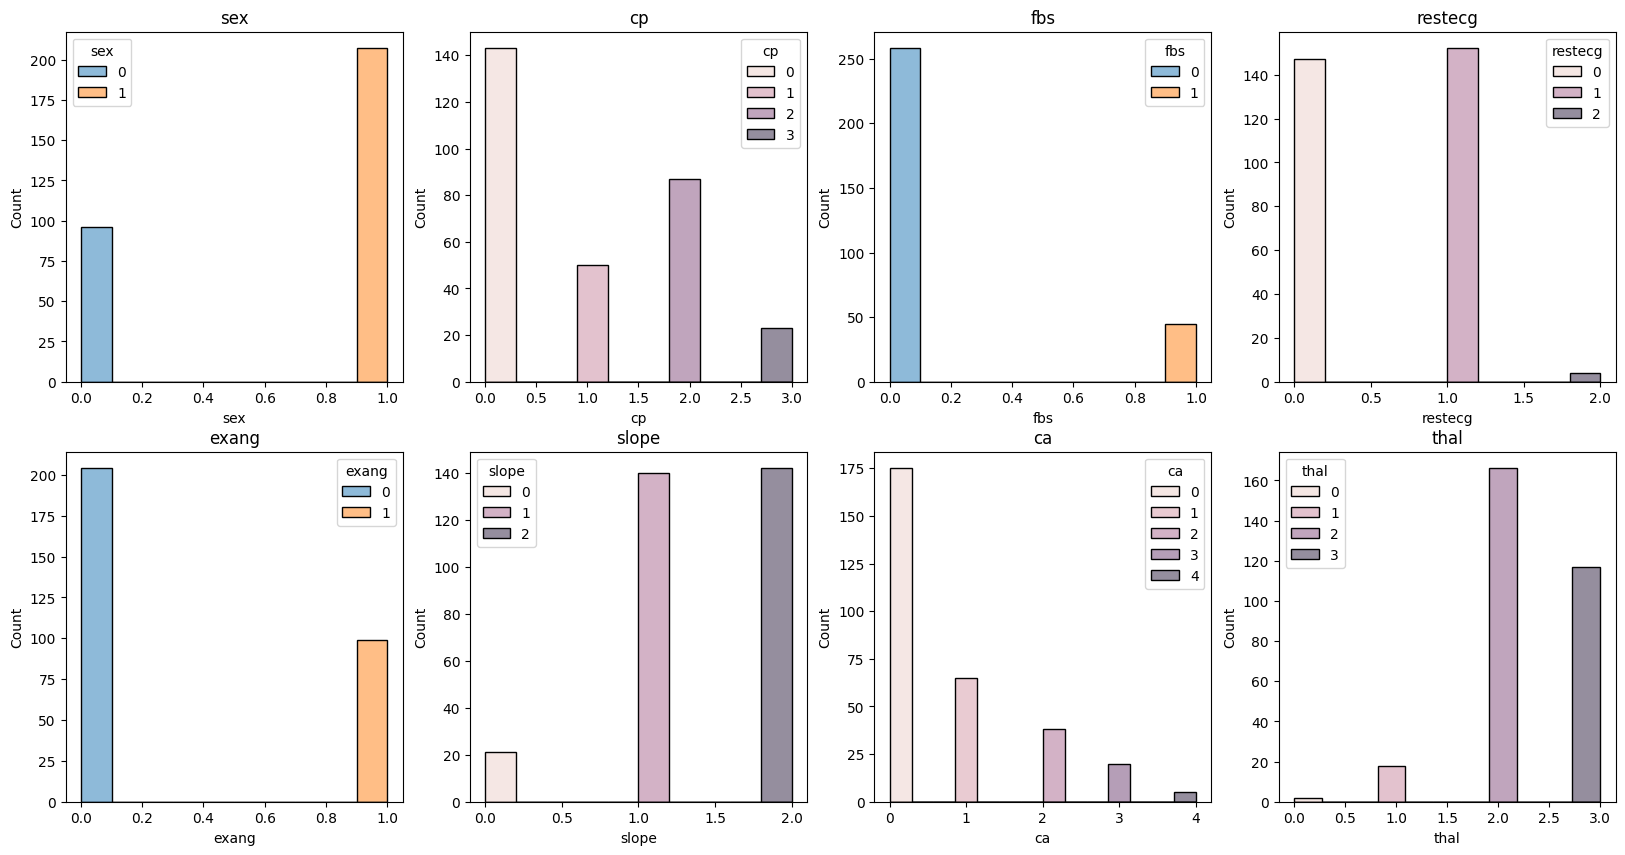

In [ ]:
fig, axs = plt.subplots(2, 4, figsize=(20, 10))

for index, column in enumerate(columns_list):
    # Calculate value counts
    value_counts = heart_data[column].value_counts()
    # Plot histogram
    row = index // 4
    col = index % 4
    sns.histplot(data=heart_data, x=column, hue=column, ax=axs[row, col])
    axs[row, col].set_title(column)

plt.show()


<Figure size 4000x3500 with 0 Axes>

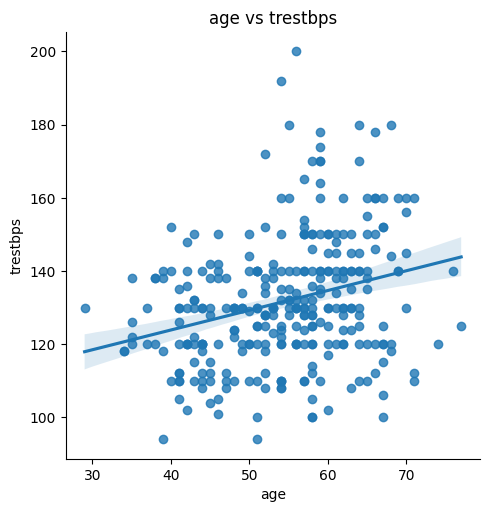

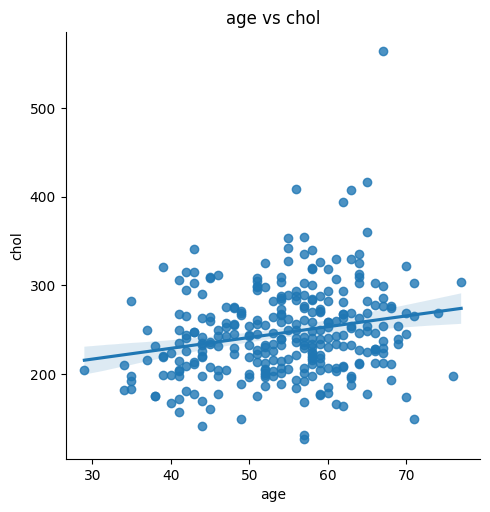

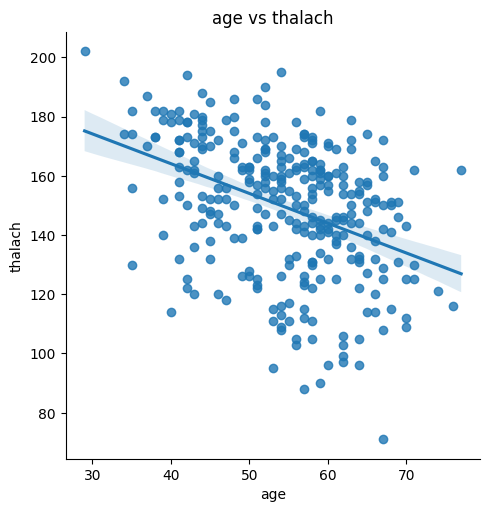

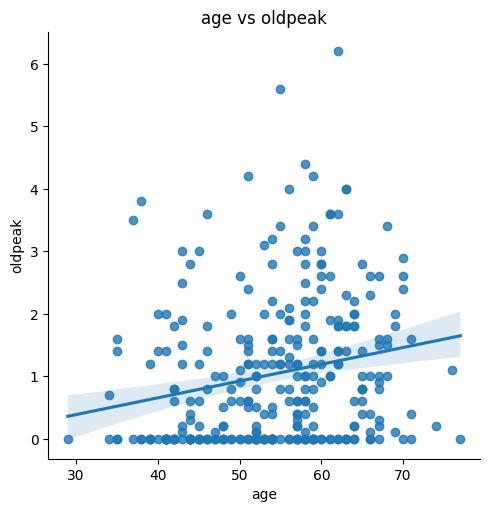

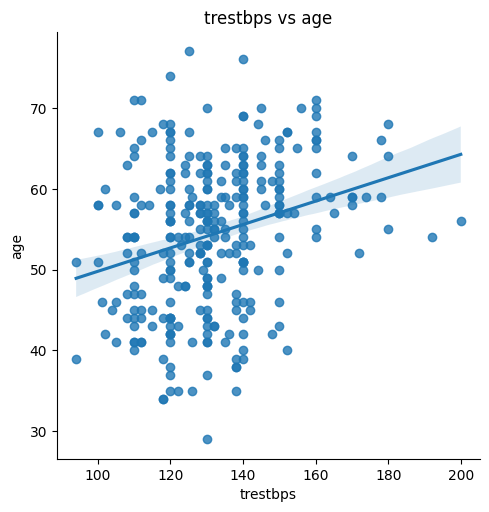

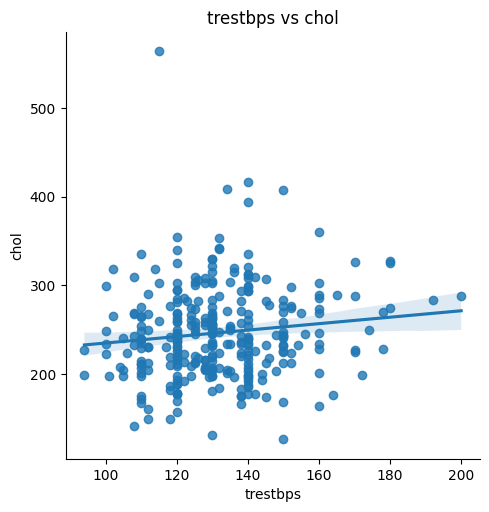

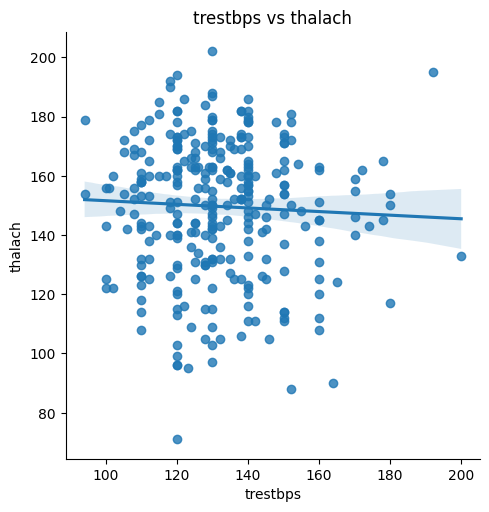

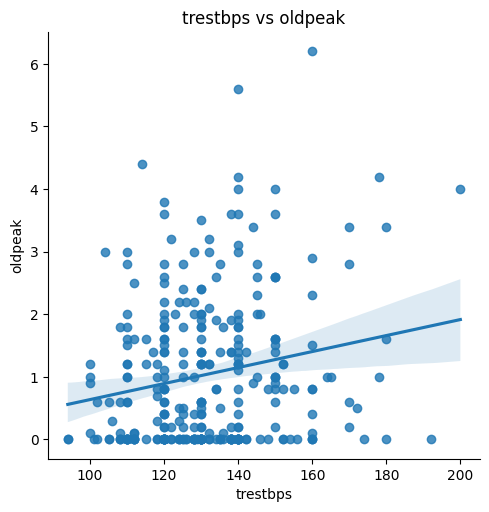

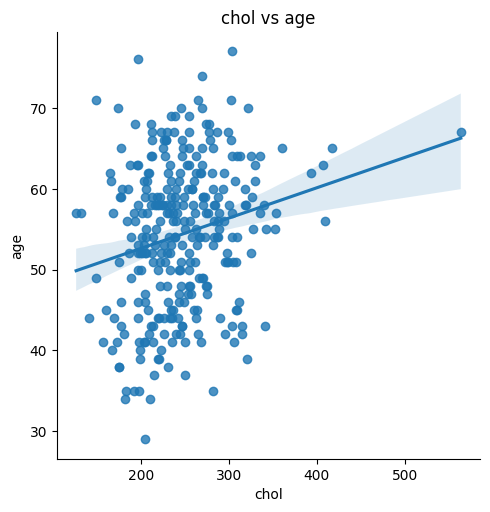

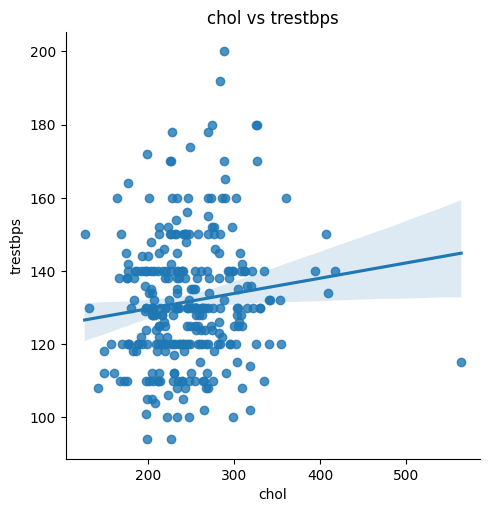

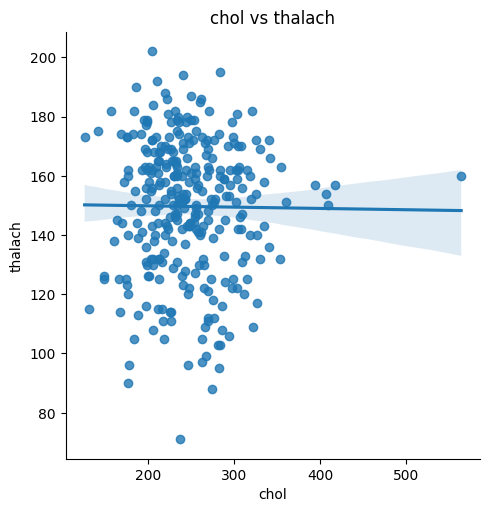

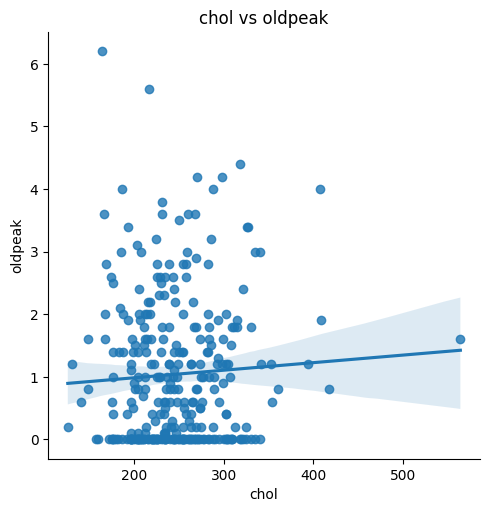

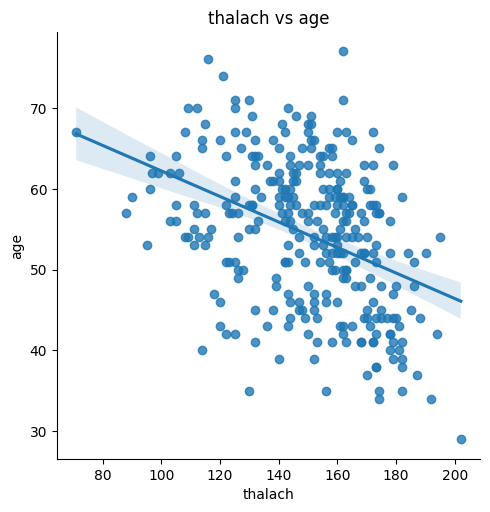

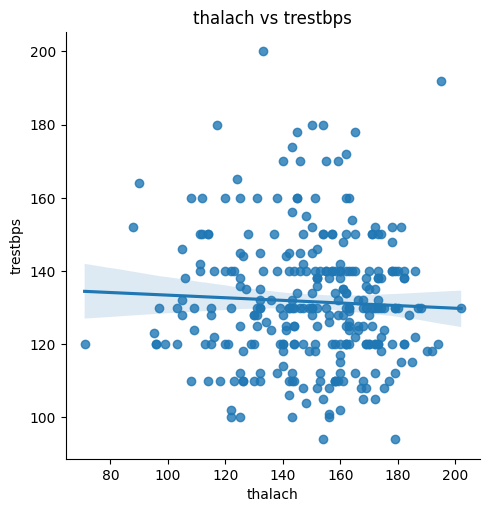

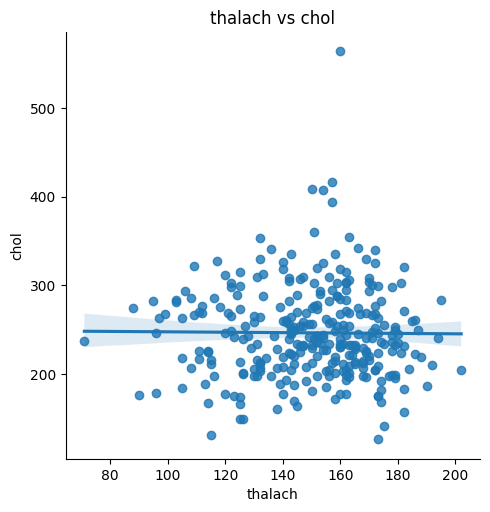

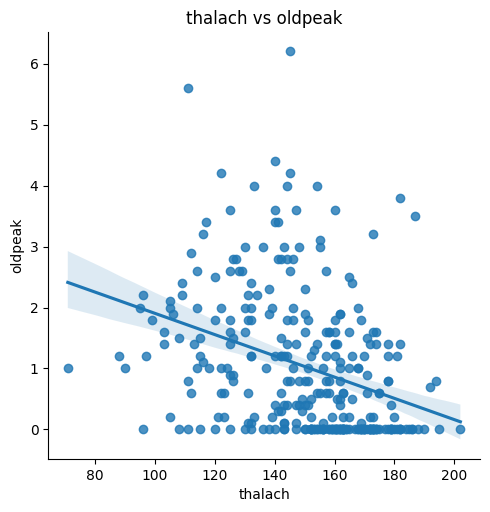

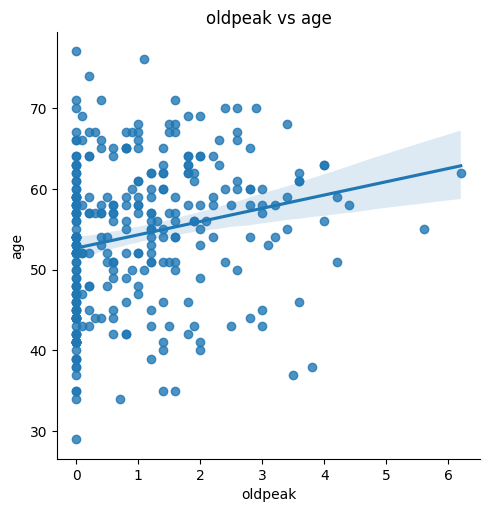

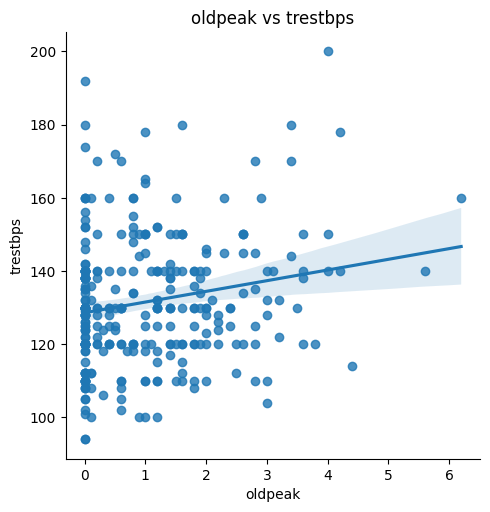

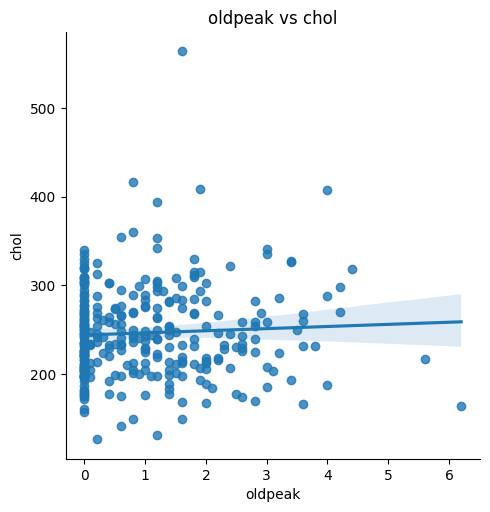

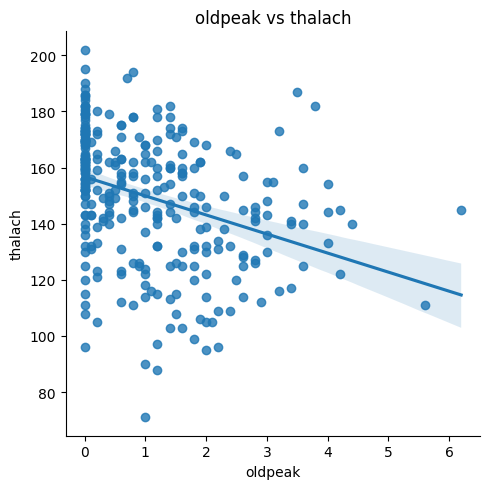

In [ ]:

# Set the figure size
plt.figure(figsize=(40, 35))

# Loop over the continuous columns
for i, column1 in enumerate(columns_con):
    for j, column2 in enumerate(columns_con):
        # Check if the current pair of columns are different
        if column1 != column2:
            # Create a scatter plot using sns.lmplot()
            sns.lmplot(x=column1, y=column2, data=heart_data)
            # Set the title of the subplot
            plt.title(column1 + " vs " + column2)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

<p align="right">نمودار همبستگی به شکل دیگر و با استفاده از رگرسیون خطی در اینجا نمایش داده شده است

**Generating missing values**

In [ ]:
generate_missing_columns = {"age": 0, "fbs": 0, "exang": 0, "slope": 0, "trestbps": 0}

for column in generate_missing_columns:
  random_number_of_missing = np.random.randint(0, int(len(heart_data)/10))
  generate_missing_columns[column] = random_number_of_missing

for columns, random_missing in generate_missing_columns.items():
    for array in range(random_missing):
      missing_index = np.random.randint(0, len(heart_data))
      heart_data[columns][missing_index] = np.nan

In [ ]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       282 non-null    float64
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  288 non-null    float64
 4   chol      303 non-null    int64  
 5   fbs       285 non-null    float64
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     288 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     284 non-null    float64
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(6), int64(8)
memory usage: 33.3 KB


In [ ]:
imp_mean = SimpleImputer(strategy='mean')

for columns in generate_missing_columns:
  heart_data[columns] = imp_mean.fit_transform(heart_data[columns].values.reshape(-1,1))

In [ ]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(6), int64(8)
memory usage: 33.3 KB


# **Building models**

**Data splitting**

In [ ]:
X = heart_data.iloc[:, :-1]
y = heart_data.iloc[:, -1].values

In [ ]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.000000,1,3,145.0,233,0.150877,0,150,0.0,2.3,0.0,0,1
1,37.000000,1,2,130.0,250,0.000000,1,187,0.0,3.5,0.0,0,2
2,41.000000,0,1,130.0,204,0.150877,0,172,0.0,1.4,2.0,0,2
3,56.000000,1,1,120.0,236,0.000000,1,178,0.0,0.8,2.0,0,2
4,57.000000,0,0,120.0,354,0.000000,1,163,1.0,0.6,2.0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57.000000,0,0,140.0,241,0.000000,1,123,1.0,0.2,1.0,0,3
299,45.000000,1,3,110.0,264,0.150877,1,132,0.0,1.2,1.0,0,3
300,54.351064,1,0,144.0,193,0.150877,1,141,0.0,3.4,1.0,2,3
301,57.000000,1,0,130.0,131,0.000000,1,115,1.0,1.2,1.0,1,3


In [ ]:
y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)


In [ ]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

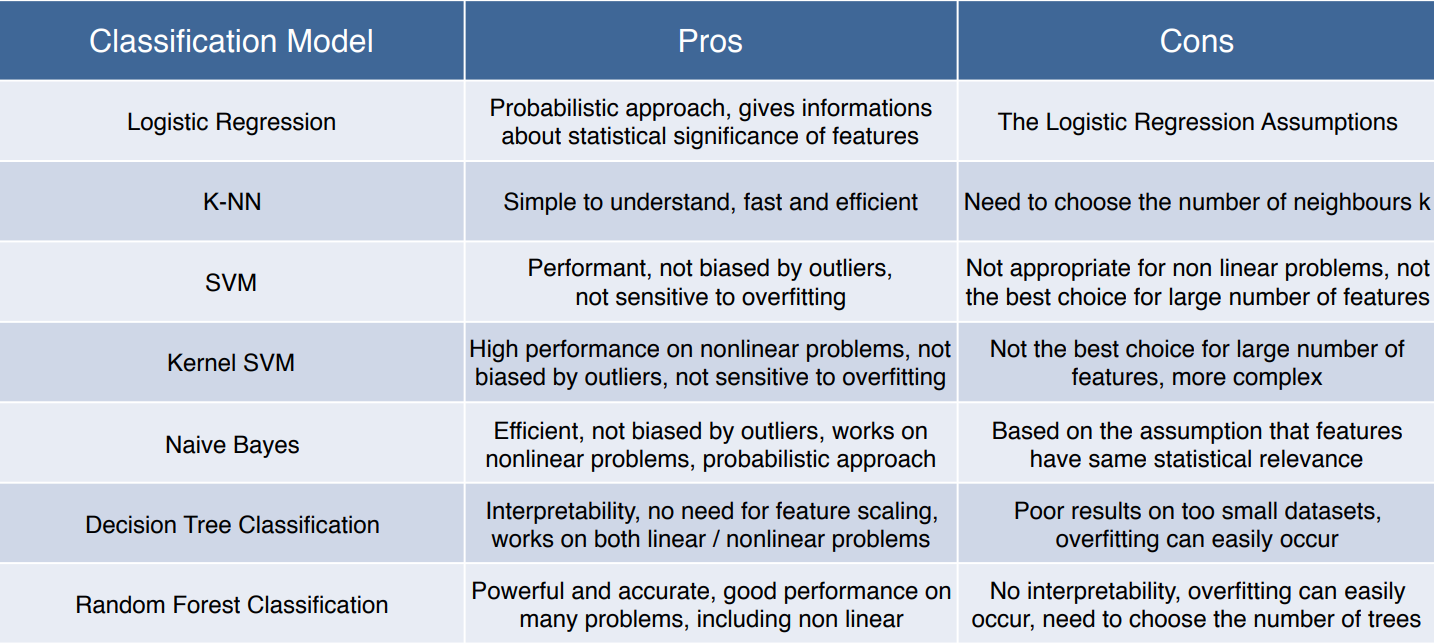

# **Phase 1: Classification**

In [ ]:
models = {'lg' : LogisticRegression(),
    'knn' : KNeighborsClassifier(),
    'svm' : SVC(),
    'gnb' : GaussianNB(),
    'dt' : DecisionTreeClassifier(),
    'rf' : RandomForestClassifier(),
    'boosting' : AdaBoostClassifier(),
    'bagging' : BaggingClassifier()}

param_grids = {
    'lg': {
        'penalty': ['l2', 'none'],
        'C': [0.001, 0.01, 0.1, 1, 10],
        'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
        'max_iter': [100, 200, 300]
    },
    'knn': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree'],
        'leaf_size': [30, 40, 50]
    },
    'svm': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'gamma': ['scale', 'auto'],
        'degree': [2, 3, 4]
    },
    'gnb': {},
    'dt': {
        'criterion': ['gini', 'entropy'],
        'splitter': ['best', 'random'],
        'max_depth': [None, 5, 10, 15],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'rf': {
        'n_estimators': [10, 50, 100],
        'criterion': ['gini', 'entropy'],
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'boosting': {
        'n_estimators': [10, 50, 100],
        'learning_rate': [0.1, 0.5, 1.0],
        'base_estimator': [DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2)],
        'algorithm': ['SAMME', 'SAMME.R']
    },
    'bagging': {
        'n_estimators': [10, 50, 100],
        'max_samples': [0.5, 1.0],
        'base_estimator': [None, DecisionTreeClassifier(max_depth=1), DecisionTreeClassifier(max_depth=2)],
        'bootstrap': [True, False],
        'bootstrap_features': [True, False]
    }
}


class ModelPipeline:
    def __init__(self, models, X_train, X_test, y_train, y_test):
        self.models = models
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.param_grids = param_grids 
        self.predictions = {}
        self.pred_proba = {}
        self.cm = {} 
        self.best_models = {}

    @staticmethod
    def __get_model_name(model_pred):
      model_name = model_pred.replace("y_pred_", "")
      return type(models[model_name]).__name__

    def fit_models(self):
        for model in self.models.values():
            model.fit(self.X_train, self.y_train)
  
    def prediction(self):
        for model_name, model in self.models.items():
            pred_str = 'y_pred_{}'.format(model_name)
            pred_model = model.predict(self.X_test)
            self.predictions[pred_str] = pred_model
  
    def metrics(self):
        self.prediction()

        for model_pred, y_pred in self.predictions.items():
            model_name = self.__get_model_name(model_pred)
            cm_str = 'cm_{}'.format(model_name)
            cm_model = confusion_matrix(self.y_test, y_pred)
            self.cm[cm_str] = cm_model

            print(50 * '-' + ' {} '.format(model_name) + 50 * '-')
            sns.heatmap(cm_model, annot=True)
            plt.show()
            print(classification_report(self.y_test, y_pred))


    
    def curve(self):
        plt.figure(figsize=(20, 10))
        auc_score_list = []
        colors = cm.rainbow(np.linspace(0, 1, len(self.models)))
        color_counter = 0

        for model_name, model in self.models.items():
            pred_str = 'y_pred_proba_{}'.format(model_name)

            if hasattr(model, 'predict_proba'):
                pred_model = model.predict_proba(self.X_test)
                self.pred_proba[pred_str] = pred_model

                fpr, tpr, thresh = roc_curve(self.y_test, self.pred_proba[pred_str][:, 1], pos_label=1)

                # roc curve for tpr = fpr
                random_probs = [0 for _ in range(len(self.y_test))]
                p_fpr, p_tpr, _ = roc_curve(self.y_test, random_probs, pos_label=1)

                auc_score = roc_auc_score(self.y_test, self.pred_proba[pred_str][:, 1])
                auc_score_list.append(auc_score)

                plt.style.use('seaborn')
                # plot roc curve with a different color for each model
                plt.plot(fpr, tpr, linestyle='--', color=colors[color_counter], label=model_name)
                plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
                # update color counter
                color_counter += 1

        # title
        plt.title('ROC curve')
        # x label
        plt.xlabel('False Positive Rate')
        # y label
        plt.ylabel('True Positive Rate')
        plt.legend(loc='best')
        plt.savefig('ROC', dpi=300)
        plt.show()

    def plot_auc_curve(self):
        plt.figure(figsize=(20, 10))
        for model_name, model in self.models.items():
            pred_str = 'y_pred_proba_{}'.format(model_name)
            if hasattr(model, 'predict_proba'):
                pred_model = model.predict_proba(self.X_test)
                self.pred_proba[pred_str] = pred_model
                auc_score = roc_auc_score(self.y_test, self.pred_proba[pred_str][:, 1])
                plt.bar(model_name, auc_score)
        plt.xlabel('Model')
        plt.ylabel('AUC Score')
        plt.title('Area Under the ROC Curve (AUC) Scores')
        plt.show()


    def gridsearch(self):
        for model_name, model in self.models.items():
            param_grid = self.param_grids[model_name]
            grid_search = GridSearchCV(model, param_grid, scoring='accuracy', cv=5)
            grid_search.fit(self.X_train, self.y_train)
            best_params = grid_search.best_params_
            best_model = grid_search.best_estimator_

            self.best_models[model_name] = best_model

            model_name = self.__get_model_name(model_name)
            print('\n')
            print(50 * '-' + ' {} '.format(model_name) + 50 * '-')
            print('Grid Search Results for {}:'.format(model_name))
            print('Best Parameters:', best_params)
            print('Best Model:', best_model)

        return self.best_models

    def get_classification_report(self):
        for model_name, model in self.best_models.items():
            model_name = self.__get_model_name(model_name)
            print('\n')
            print(50 * '-' + ' {} '.format(model_name) + 50 * '-')
            y_pred = model.predict(self.X_test)
            print('Classification Report for {}:'.format(model_name))
            print(classification_report(self.y_test, y_pred))

In [ ]:
mp = ModelPipeline(models, X_train, X_test, y_train, y_test)

In [ ]:
mp.fit_models()

In [ ]:
mp.prediction()

-------------------------------------------------- LogisticRegression --------------------------------------------------


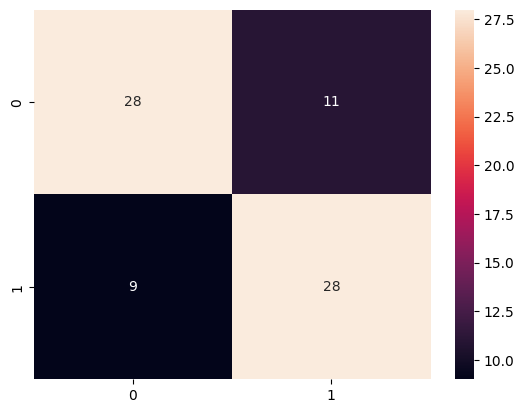

              precision    recall  f1-score   support

           0       0.76      0.72      0.74        39
           1       0.72      0.76      0.74        37

    accuracy                           0.74        76
   macro avg       0.74      0.74      0.74        76
weighted avg       0.74      0.74      0.74        76

-------------------------------------------------- KNeighborsClassifier --------------------------------------------------


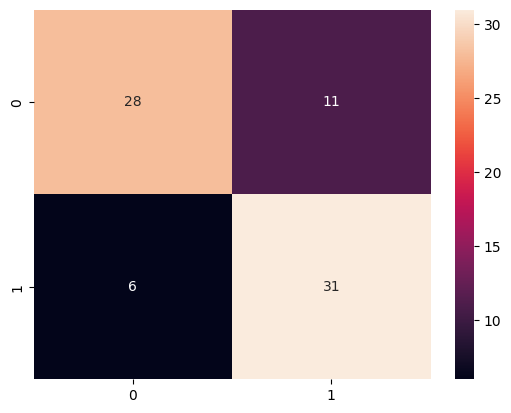

              precision    recall  f1-score   support

           0       0.82      0.72      0.77        39
           1       0.74      0.84      0.78        37

    accuracy                           0.78        76
   macro avg       0.78      0.78      0.78        76
weighted avg       0.78      0.78      0.78        76

-------------------------------------------------- SVC --------------------------------------------------


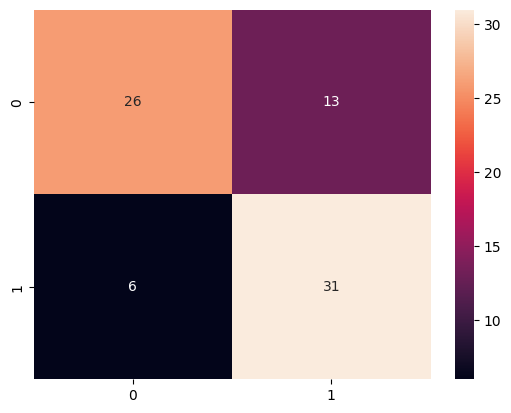

              precision    recall  f1-score   support

           0       0.81      0.67      0.73        39
           1       0.70      0.84      0.77        37

    accuracy                           0.75        76
   macro avg       0.76      0.75      0.75        76
weighted avg       0.76      0.75      0.75        76

-------------------------------------------------- GaussianNB --------------------------------------------------


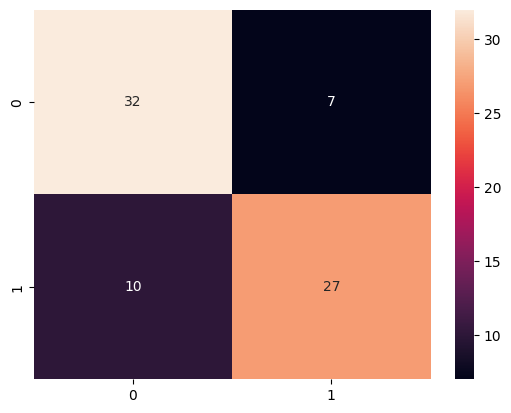

              precision    recall  f1-score   support

           0       0.76      0.82      0.79        39
           1       0.79      0.73      0.76        37

    accuracy                           0.78        76
   macro avg       0.78      0.78      0.78        76
weighted avg       0.78      0.78      0.78        76

-------------------------------------------------- DecisionTreeClassifier --------------------------------------------------


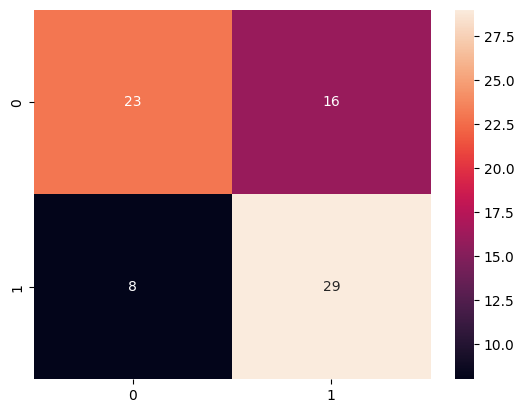

              precision    recall  f1-score   support

           0       0.74      0.59      0.66        39
           1       0.64      0.78      0.71        37

    accuracy                           0.68        76
   macro avg       0.69      0.69      0.68        76
weighted avg       0.69      0.68      0.68        76

-------------------------------------------------- RandomForestClassifier --------------------------------------------------


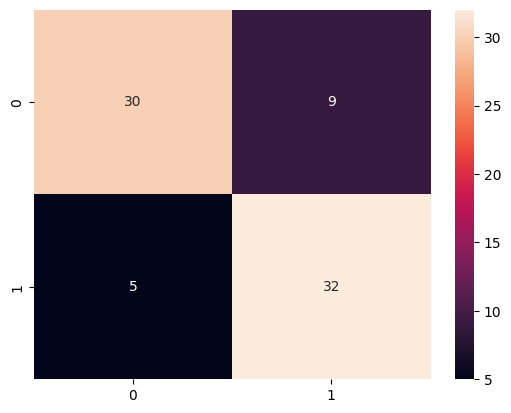

              precision    recall  f1-score   support

           0       0.86      0.77      0.81        39
           1       0.78      0.86      0.82        37

    accuracy                           0.82        76
   macro avg       0.82      0.82      0.82        76
weighted avg       0.82      0.82      0.82        76

-------------------------------------------------- AdaBoostClassifier --------------------------------------------------


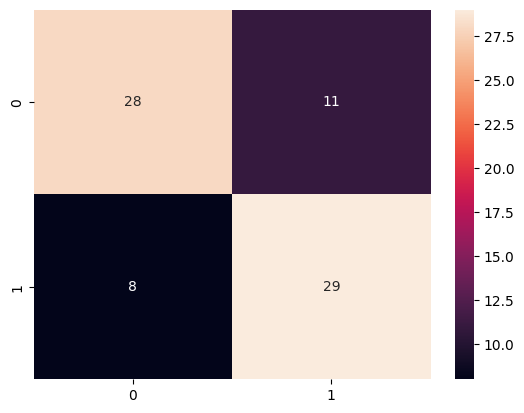

              precision    recall  f1-score   support

           0       0.78      0.72      0.75        39
           1       0.72      0.78      0.75        37

    accuracy                           0.75        76
   macro avg       0.75      0.75      0.75        76
weighted avg       0.75      0.75      0.75        76

-------------------------------------------------- BaggingClassifier --------------------------------------------------


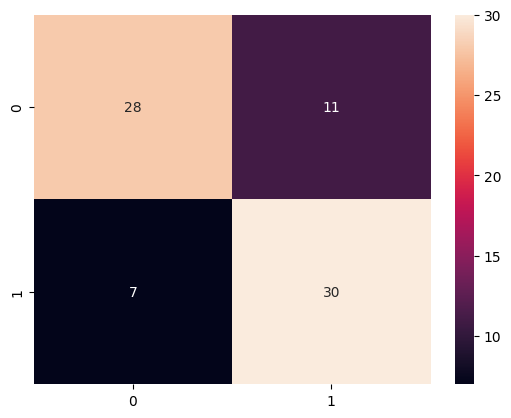

              precision    recall  f1-score   support

           0       0.80      0.72      0.76        39
           1       0.73      0.81      0.77        37

    accuracy                           0.76        76
   macro avg       0.77      0.76      0.76        76
weighted avg       0.77      0.76      0.76        76



In [ ]:
mp.metrics()

<p align="right">طبق متریک دقت، مدل کا نزدیک ترین همسایه و نایو بیز از بقیه بهتر هستند



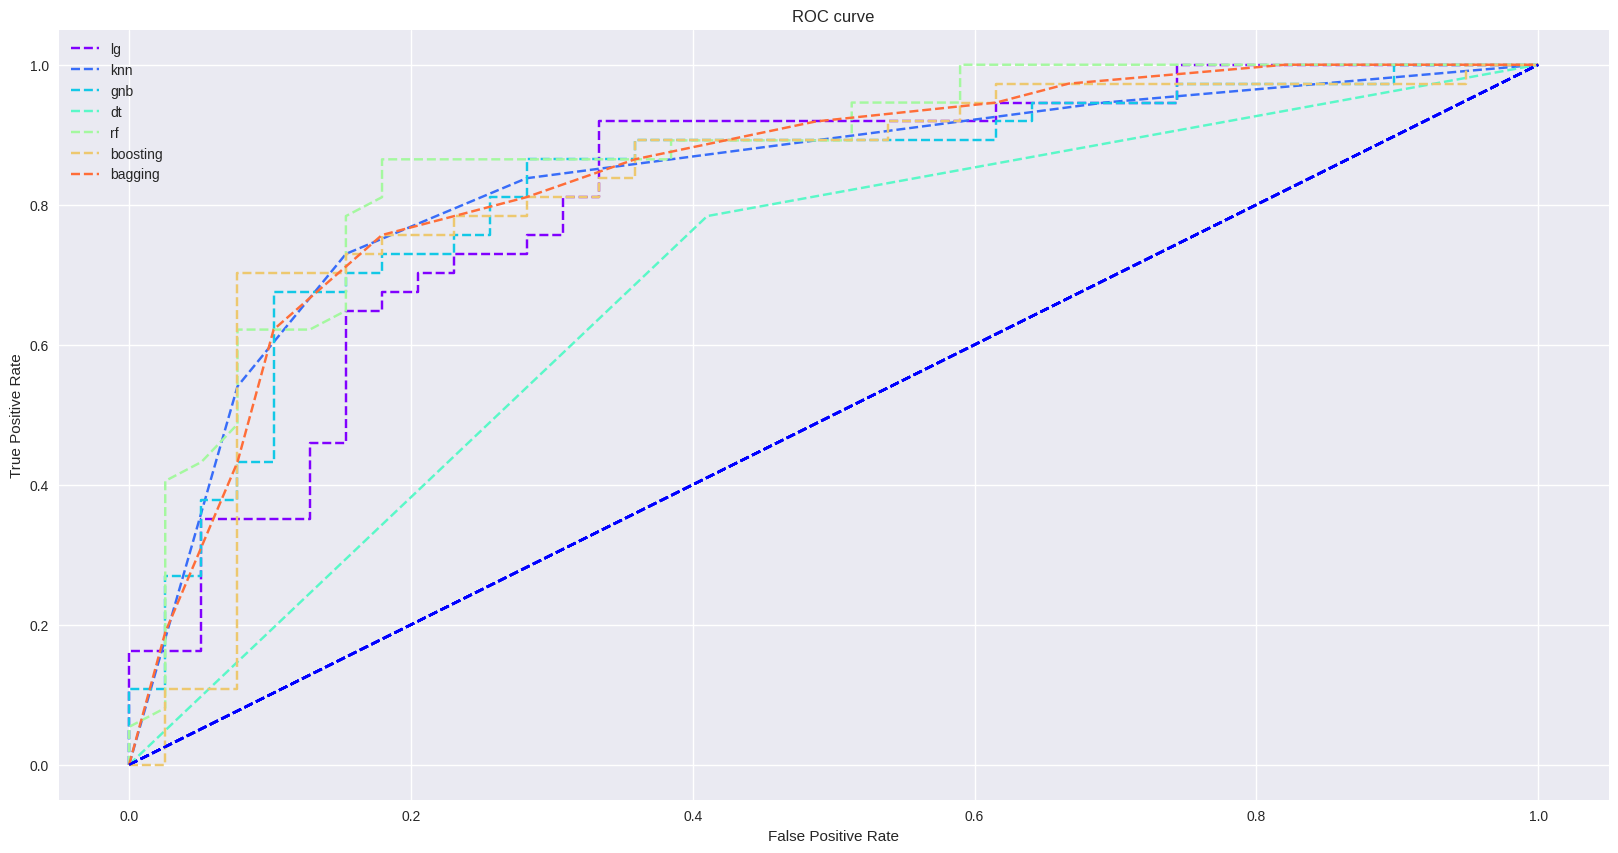

In [ ]:
mp.curve()

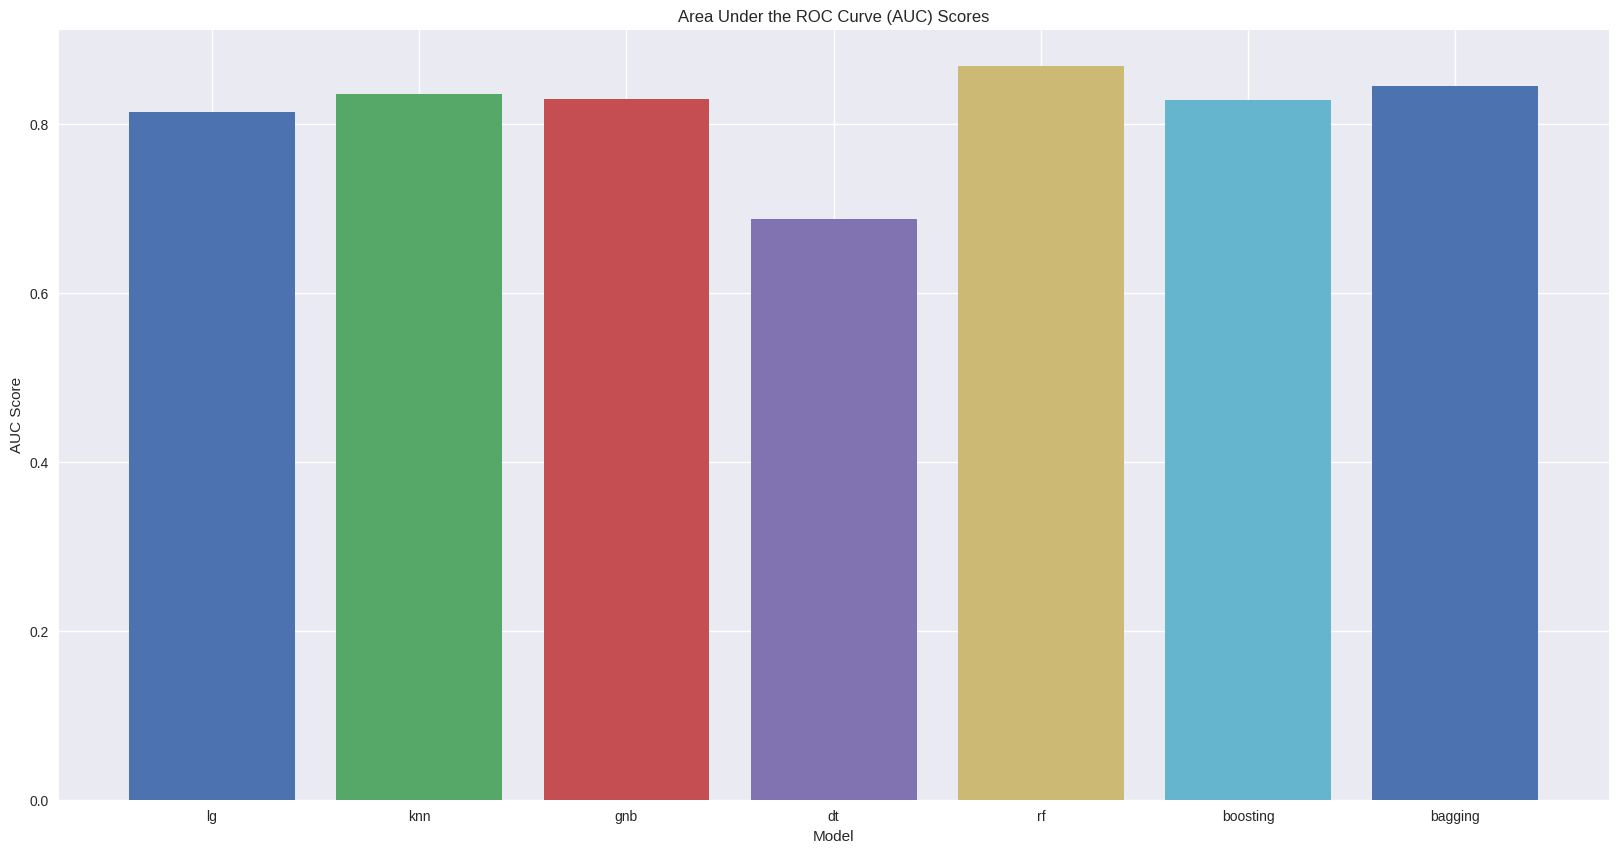

In [ ]:
mp.plot_auc_curve()

In [ ]:
best_models = mp.gridsearch()

# Get the classification report for the best models
mp.get_classification_report()



-------------------------------------------------- LogisticRegression --------------------------------------------------
Grid Search Results for LogisticRegression:
Best Parameters: {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best Model: LogisticRegression(C=0.1, solver='liblinear')


-------------------------------------------------- KNeighborsClassifier --------------------------------------------------
Grid Search Results for KNeighborsClassifier:
Best Parameters: {'algorithm': 'auto', 'leaf_size': 30, 'n_neighbors': 7, 'weights': 'uniform'}
Best Model: KNeighborsClassifier(n_neighbors=7)


-------------------------------------------------- SVC --------------------------------------------------
Grid Search Results for SVC:
Best Parameters: {'C': 10, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
Best Model: SVC(C=10, degree=2, kernel='linear')


-------------------------------------------------- GaussianNB -----------------------------------------------

# ***Phase 2: Clustering***

In [ ]:
df = heart_data.iloc[:, :-1]
df = sc.fit_transform(df)

df

array([[ 0.98291902,  0.68100522,  1.97312292, ..., -2.30888189,
        -0.71442887, -2.14887271],
       [-1.97188305,  0.68100522,  1.00257707, ..., -2.30888189,
        -0.71442887, -0.51292188],
       [-1.51729811, -1.46841752,  0.03203122, ...,  1.0196585 ,
        -0.71442887, -0.51292188],
       ...,
       [ 0.        ,  0.68100522, -0.93851463, ..., -0.6446117 ,
         1.24459328,  1.12302895],
       [ 0.30104162,  0.68100522, -0.93851463, ..., -0.6446117 ,
         0.26508221,  1.12302895],
       [ 0.30104162, -1.46841752,  0.03203122, ..., -0.6446117 ,
         0.26508221, -0.51292188]])

In [ ]:
class Cluster:

    def __init__(self, data):
        self.data = data

    def number_of_clusters(self):
        inertia = []
        k_values = range(1, 11)

        for k in k_values:
            kmeans = KMeans(n_clusters=k, random_state=42)
            kmeans.fit(self.data)
            inertia.append(kmeans.inertia_)

        # Plot the Elbow curve
        plt.plot(k_values, inertia, 'bo-')
        plt.xlabel('Number of Clusters (k)')
        plt.ylabel('Inertia')
        plt.title('Elbow Method')
        plt.show()

        plt.figure(figsize=(10, 5))
        dendrogram(linkage(self.data, method='ward'))
        plt.title('Dendrogram')
        plt.xlabel('Sample Index')
        plt.ylabel('Distance')
        plt.show()

    def kmeans(self, k):
      kmeans = KMeans(n_clusters=k, random_state=42)
      kmeans.fit(df)
      labels = kmeans.labels_

      self.labels = labels
    
    def score(self):
      silhouette_avg = silhouette_score(self.data, self.labels)
      print('Silhouette Score:', silhouette_avg)

      # Calculate pairwise distances
      pairwise_dist = pairwise_distances(self.data)
      print('Pairwise Distances:')
      print(pairwise_dist)

      # Calculate Calinski-Harabasz score
      calinski_harabasz = calinski_harabasz_score(self.data, self.labels)
      print('Calinski-Harabasz Score:', calinski_harabasz)

      # Calculate Davies-Bouldin score
      davies_bouldin = davies_bouldin_score(self.data, self.labels)
      print('Davies-Bouldin Score:', davies_bouldin)


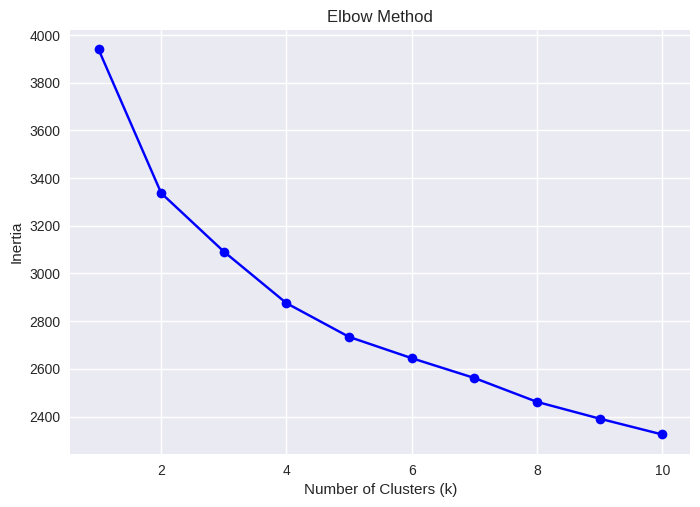

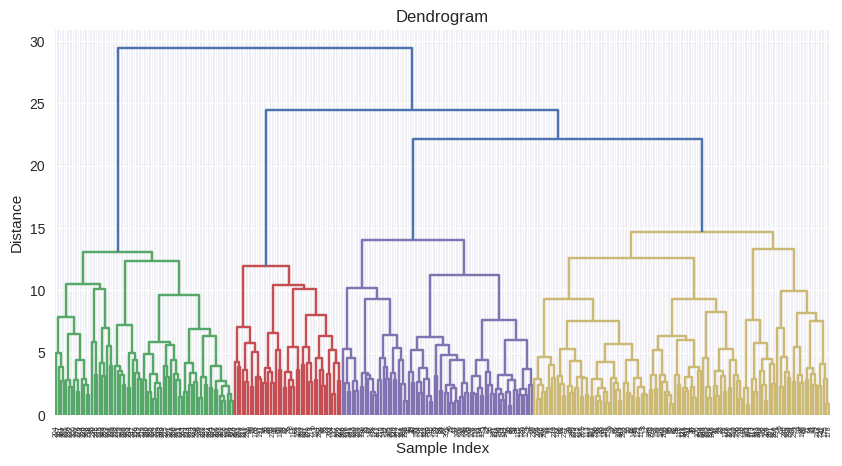

In [ ]:
cl = Cluster(df)

cl.number_of_clusters()

In [ ]:
cl.kmeans(2)
cl.score()

Silhouette Score: 0.1658884407173749
Pairwise Distances:
[[0.         4.55300227 5.56801909 ... 5.660504   6.31671554 4.61032425]
 [4.55300227 0.         5.0167341  ... 4.80245057 6.26825202 5.2534765 ]
 [5.56801909 5.0167341  0.         ... 5.12868474 5.66888267 3.01219345]
 ...
 [5.660504   4.80245057 5.12868474 ... 0.         3.61228071 5.01490317]
 [6.31671554 6.26825202 5.66888267 ... 3.61228071 0.         5.34084668]
 [4.61032425 5.2534765  3.01219345 ... 5.01490317 5.34084668 0.        ]]
Calinski-Harabasz Score: 54.332950552686654
Davies-Bouldin Score: 2.2142759844468283


In [ ]:
cl.kmeans(3)
cl.score()

Silhouette Score: 0.11372458474377642
Pairwise Distances:
[[0.         4.55300227 5.56801909 ... 5.660504   6.31671554 4.61032425]
 [4.55300227 0.         5.0167341  ... 4.80245057 6.26825202 5.2534765 ]
 [5.56801909 5.0167341  0.         ... 5.12868474 5.66888267 3.01219345]
 ...
 [5.660504   4.80245057 5.12868474 ... 0.         3.61228071 5.01490317]
 [6.31671554 6.26825202 5.66888267 ... 3.61228071 0.         5.34084668]
 [4.61032425 5.2534765  3.01219345 ... 5.01490317 5.34084668 0.        ]]
Calinski-Harabasz Score: 41.10932900628911
Davies-Bouldin Score: 2.48725691603776
